In [2]:
import re
import csv

#.xyファイルを最適化、.csvファイルに変換
def data_read(path, mode, filename, contents):
    with open(path, mode) as f1:
        with open(filename, 'a', newline="") as f2:
            t = 0
            row = f1.readline()
            writer = csv.writer(f2)
            while row:
                if contents:
                    print("---- Row data ----")
                    print("Type of ""data"":{}".format(type(row)))
                    print(row)
                if t > -1:
                    s = re.split(' |\t', row)
                    if contents:
                        print(s)
                    writer.writerow([s[0], s[1]])
                t = t + 1
                row = f1.readline()

#ファイル名の設定
def data_create(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    filename = 'PPMS_Data_Edited/'+name[len(name)-1]+'.csv'
    with open(filename, 'w') as f:
        f.write('')
        print(name[len(name)-1] + ' was created!')
        print(filename)
    return filename

#本文
if __name__=="__main__":
    path = 'Data/Ni 9.6 % (μΩcm-K).txt'
    mode = "r"
    filename = data_create(path)
    data_read(path, mode, filename, False)
    

6 % (μΩcm-K) was created!
PPMS_Data_Edited/6 % (μΩcm-K).csv


In [10]:
df_Hc2_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hc2.csv', header = 0)
df_Hirr_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hirr.csv', header = 0)
df_Hc2_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hc2.csv', header = 0)
df_Hirr_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hirr.csv', header = 0)

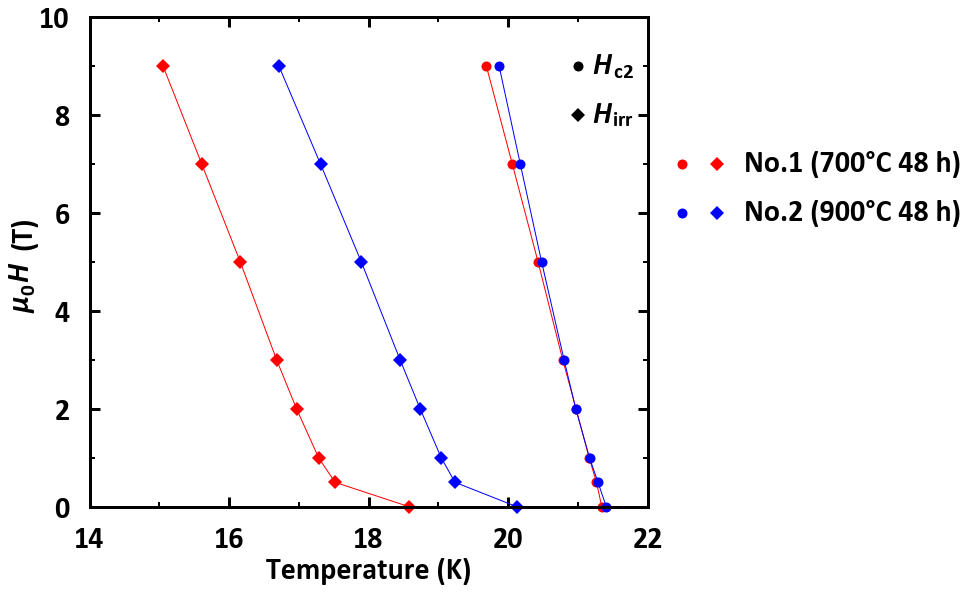

In [96]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')

#色設定
col = ['red', 'blue', 'yellow', 'green', 'pink', 'gray', 'black', 'orange']

#凡例
labels = ['0', '5000 (Oe)', '10000', '20000', '30000', '50000', '70000', '90000']

#画像の名前
def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'PPMS_Result/'+name[len(name)-1]+'.png'

#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(14, 22)
ax1.set_xticks(np.arange(14, 23, 2))
ax1.set_xticklabels(np.arange(14, 23, 2), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Temperature (K)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#y軸の目盛りの設定
ax1.set_ylim(0, 100000)
ax1.set_yticks(np.arange(0, 110000, 20000))
ax1.set_yticklabels(np.arange(0, 11, 2), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'H '+'$\mathbf{(T)}$', fontproperties = f_Calibriz, fontsize = 30)
ax1.text(13.25, 45000, '$\mathregular{\\mu}$  H', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(13.25, 44500, '$\mathregular{_0}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(13.25, 56000, '(T)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10000))

#プロット
ax1.plot(df_Hc2_700['Temperature (K)'], df_Hc2_700["Magnetic Field (Oe)"], color = 'red', marker = '.', markersize = '20', markerfacecolor = 'red', mew = 0, linewidth = 1, clip_on = False)
ax1.plot(df_Hirr_700['Temperature (K)'],df_Hirr_700["Magnetic Field (Oe)"], color = 'red', marker = 'D', markersize = '10', markerfacecolor = 'red', mew = 0, linewidth = 1, clip_on = False)
ax1.plot(df_Hc2_900['Temperature (K)'], df_Hc2_900["Magnetic Field (Oe)"], color = 'blue', marker = '.', markersize = '20', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)
ax1.plot(df_Hirr_900['Temperature (K)'],df_Hirr_900["Magnetic Field (Oe)"], color = 'blue', marker = 'D', markersize = '10', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibri.ttf'}, frameon = False,)

#テキスト
ax1.text(21.8, 90000, '$\mathregular{H}$    ', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(21.8, 90000, r'$\mathregular{_{c2}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(21, 90000, color = 'red', marker = '.', markersize = '20', markerfacecolor = 'k', mew = 0, linewidth = 1, clip_on = False)
ax1.text(21.8, 80000, '$\mathregular{H}$    ', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(21.8, 80000, r'$\mathregular{_{irr}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(21, 80000, color = 'red', marker = 'D', markersize = '10', markerfacecolor = 'k', mew = 0, linewidth = 1, clip_on = False)

ax1.text(26.5, 70000, 'No.1 (700°C 48 h)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(22.5, 70000, color = 'red', marker = '.', markersize = '20', markerfacecolor = 'red', mew = 0, linewidth = 1, clip_on = False)
ax1.plot(23.0, 70000, color = 'red', marker = 'D', markersize = '10', markerfacecolor = 'red', mew = 0, linewidth = 1, clip_on = False)
ax1.text(26.5, 60000, 'No.2 (900°C 48 h)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(22.5, 60000, color = 'red', marker = '.', markersize = '20', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)
ax1.plot(23.0, 60000, color = 'red', marker = 'D', markersize = '10', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)

plt.show()

fig.savefig("PPMS_Result/Hirr_Hc2.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [3]:
import pandas as pd

df_700 = pd.read_csv('PPMS_Result/700 48h PPMS 0Tall.csv', header = 0)
df_900 = pd.read_csv('PPMS_Result/900 48h PPMS 0Tall.csv', header = 0)
df_Ni = pd.read_csv('PPMS_Data_Edited/6 % (μΩcm-K).csv', header=None, names=['Temperature (K)', 'Resistivity (Ohm-m)'])

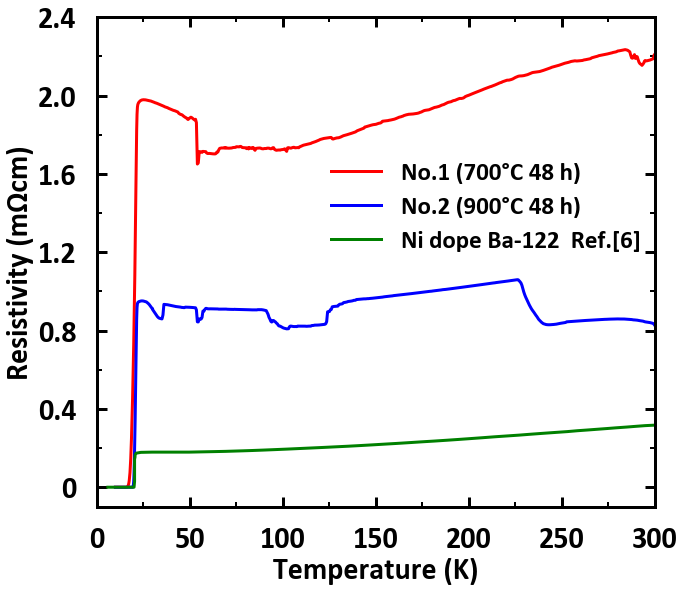

In [121]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 300)
ax1.set_xticks(np.arange(0, 301, 50))
ax1.set_xticklabels(np.arange(0, 301, 50), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Temperature (K)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))

#y軸の目盛りの設定
ax1.set_ylim(-0.0001, 0.0024)
ax1.set_yticks(np.arange(0, 0.0025, 0.0004))
ax1.set_yticklabels([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0002))

#プロット
ax1.plot(df_700['Temperature (K)'], df_700["Bridge 1 Resistivity (Ohm-m)"], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900['Temperature (K)'], df_900["Bridge 3 Resistivity (Ohm-m)"], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_Ni['Temperature (K)'], df_Ni["Resistivity (Ohm-m)"]/1000, color = 'g', label = 'Ni dope Ba-122  Ref.[6]', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)  
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':25,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False, loc = 'upper left', bbox_to_anchor=(0.38,0.75))

#テキスト

plt.show()

fig.savefig("PPMS_Result/rho.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [29]:
import pandas as pd
df_700_Hc2 = pd.read_csv('PPMS_Result/No 1 700 48h Hc2 coef.csv', header = 0)
df_900_Hc2 = pd.read_csv('PPMS_Result/No 2 900 48h Hc2 coef.csv', header = 0)

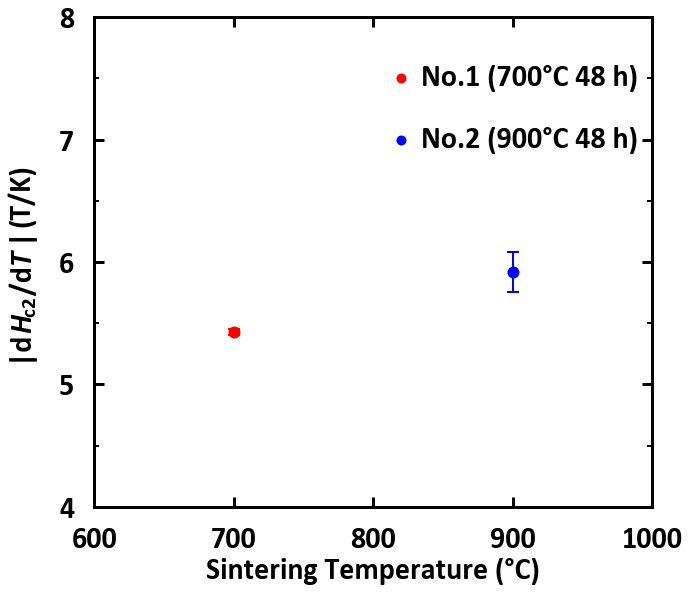

In [30]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')

#色設定
col = ['red', 'blue', 'yellow', 'green', 'pink', 'gray', 'black', 'orange']

#凡例
labels = ['0', '5000 (Oe)', '10000', '20000', '30000', '50000', '70000', '90000']

#画像の名前
def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'PPMS_Result/'+name[len(name)-1]+'.png'

#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels(np.arange(600, 1100, 100), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering Temperature (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

#y軸の目盛りの設定
ax1.set_ylim(4, 8)
ax1.set_yticks(np.arange(4, 9, 1))
ax1.set_yticklabels(np.arange(4,9,1), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
t = -0.3
ax1.text(-0.4, 6+t, '|d      /d   |', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.4, 5.8+t, '$\mathregular{H}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.4, 5.93+t, '$\mathregular{_{c2}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.42, 6.35+t, 'T', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.42, 6.85+t, '(T/K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)


#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#プロット
ax1.errorbar(1, -df_700_Hc2.iloc[1, 1], yerr = df_700_Hc2.iloc[6, 1], fmt='o', capsize = 6, elinewidth = 2, markeredgewidth = 2, color = 'red', label = 'No.1 (700°C 48 h)', markersize = '10', markerfacecolor = 'red', linewidth = 3, clip_on = False)
ax1.errorbar(3, -df_900_Hc2.iloc[1, 1], yerr = df_900_Hc2.iloc[6, 1], fmt='o', capsize = 6, elinewidth = 2, markeredgewidth = 2, color = 'blue', label = 'No.2 (900°C 48 h)', markersize = '10', markerfacecolor = 'blue', linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(3.9, 7.5, 'No.1 (700°C 48 h)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(2.2, 7.5, color = 'red', marker = '.', markersize = '20', markerfacecolor = 'red', mew = 0, linewidth = 1, clip_on = False)
ax1.text(3.9, 7, 'No.2 (900°C 48 h)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center')
ax1.plot(2.2, 7, color = 'red', marker = '.', markersize = '20', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)

plt.show()

fig.savefig("PPMS_Result/Hc2_coef_error.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [26]:
import pandas as pd
df_700_kai = pd.read_csv('VSM_Result/No.1 700 48h kai.csv', header = 0)
df_900_kai = pd.read_csv('VSM_Result/No.2 900 48h kai.csv', header = 0)


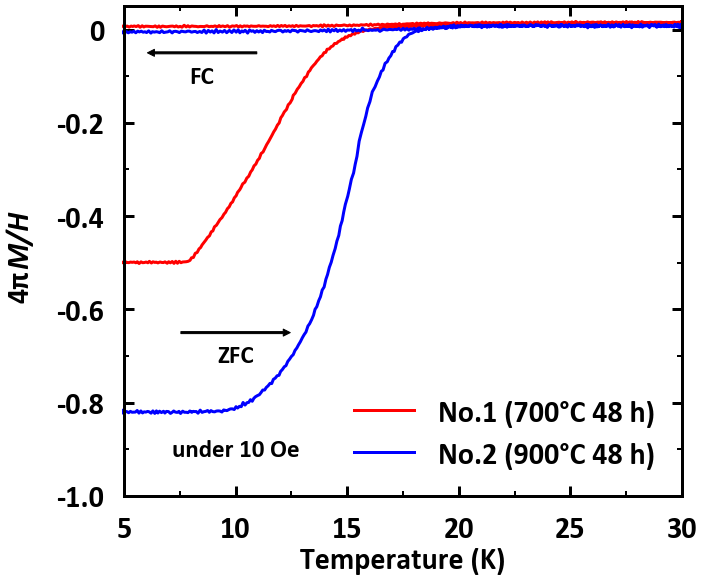

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(5, 30)
ax1.set_xticks(np.arange(5, 35, 5))
ax1.set_xticklabels(np.arange(5, 35, 5), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Temperature (K)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

#y軸の目盛りの設定
ax1.set_ylim(-1, 0.05)
ax1.set_yticks(np.arange(-1, 0.2, 0.2))
ax1.set_yticklabels([-1.0, -0.8, -0.6, -0.4, -0.2, -0,], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(1, -0.55, '4π', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(1, -0.45, 'M/H', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

#プロット
ax1.plot(df_700_kai['Temperature (K)'], df_700_kai["4piM_H"], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_kai['Temperature (K)'], df_900_kai["4piM_H"], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(10, -0.9+0.2, 'ZFC', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')
ax1.annotate(s='',xy=(12.5,-0.85+0.2),xytext=(7.5,-0.85+0.2),xycoords='data',arrowprops=dict(facecolor='black', width =2.0,headwidth=7.0,headlength=7.0,shrink=0.01))
ax1.text(7.5+1, -0.1, 'FC', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')
ax1.annotate(s='',xy=(5+1,-0.05),xytext=(10+1,-0.05),xycoords='data',arrowprops=dict(facecolor='black', width =2.0,headwidth=7.0,headlength=7.0,shrink=0.01))
ax1.text(10, -0.9, 'under 10 Oe', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')


plt.show()

fig.savefig("VSM_Result/kai T.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

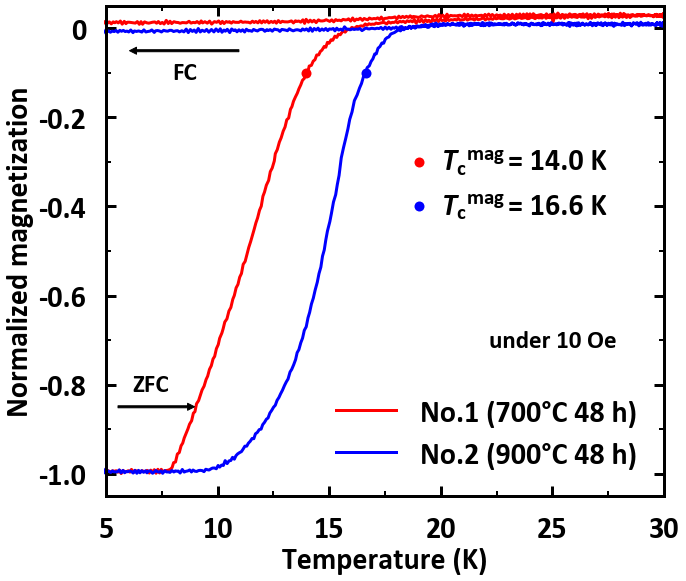

In [28]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(5, 30)
ax1.set_xticks(np.arange(5, 35, 5))
ax1.set_xticklabels(np.arange(5, 35, 5), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Temperature (K)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

#y軸の目盛りの設定
ax1.set_ylim(-1.05, 0.05)
ax1.set_yticks(np.arange(-1, 0.2, 0.2))
ax1.set_yticklabels([-1.0, -0.8, -0.6, -0.4, -0.2, -0,], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_ylabel(ylabel = 'Normalized magnetization', fontproperties = f_Calibrib, fontsize = 30)
#ax1.text(1, -0.55-0.1, '4π', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
#ax1.text(1, -0.45-0.1, 'M/H', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
#ax1.text(1, -0.35-0.1, r'$\mathregular{/\chi}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
#ax1.text(1, -0.27-0.1, r'$\mathregular{_{max}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

#プロット
ax1.plot(df_700_kai['Temperature (K)'], -df_700_kai["4piM_H"]/(df_700_kai["4piM_H"].min()), color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_kai['Temperature (K)'], -df_900_kai["4piM_H"]/(df_900_kai["4piM_H"].min()), color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(7, -0.8, 'ZFC', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')
ax1.annotate(s='',xy=(10-1,-0.85),xytext=(5+0.5,-0.85),xycoords='data',arrowprops=dict(facecolor='black', width =2.0,headwidth=7.0,headlength=7.0,shrink=0.01))
ax1.text(7.5+1, -0.1, 'FC', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')
ax1.annotate(s='',xy=(5+1,-0.05),xytext=(10+1,-0.05),xycoords='data',arrowprops=dict(facecolor='black', width =2.0,headwidth=7.0,headlength=7.0,shrink=0.01))
ax1.plot([13.956099206031604, 19], [-0.1, -0.3], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '20', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot([16.634817208379474, 19], [-0.1, -0.4], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '20', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
ax1.text(20, -0.3, r'$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'left', va = 'center')
ax1.text(20.7, -0.3, r'$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.text(23, -0.3, '= 14.0 K', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.text(20, -0.4, r'$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'left', va = 'center')
ax1.text(20.7, -0.4, r'$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.text(23, -0.4, '= 16.6 K', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.text(25, -0.7, 'under 10 Oe', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')


plt.show()

fig.savefig("VSM_Result/kai T Nomraized.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [74]:
import pandas as pd
df_700_MH = pd.read_csv('VSM_Result/No 1 700 48h MH.csv', header = 0)
df_900_MH = pd.read_csv('VSM_Result/No 2 900 48h MH.csv', header = 0)

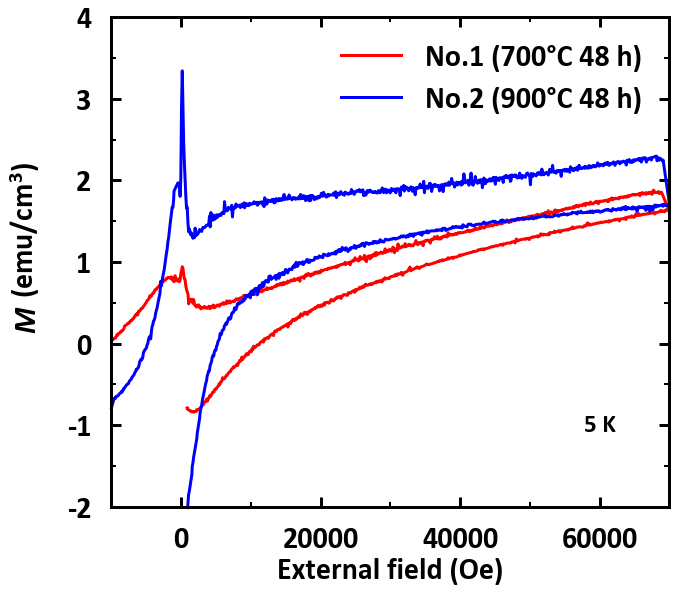

In [103]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(-10000, 70000)
ax1.set_xticks(np.arange(0, 70000, 20000))
ax1.set_xticklabels(np.arange(0, 70000, 20000), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'External field (Oe)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10000))

#y軸の目盛りの設定
ax1.set_ylim(-2, 4)
ax1.set_yticks(np.arange(-2, 5, 1))
ax1.set_yticklabels(np.arange(-2, 5, 1), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-20000, 0.3, 'M', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-20000, 1.4, '(emu/$\mathregular{cm^{3}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)


#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#プロット
ax1.plot(df_700_MH['Magnetic Field (Oe)'], df_700_MH["Moment (emu)"], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_MH['Magnetic Field (Oe)'], df_900_MH["Moment (emu)"], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(60000, -1, '5 K', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')

plt.show()

fig.savefig("VSM_Result/MH.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

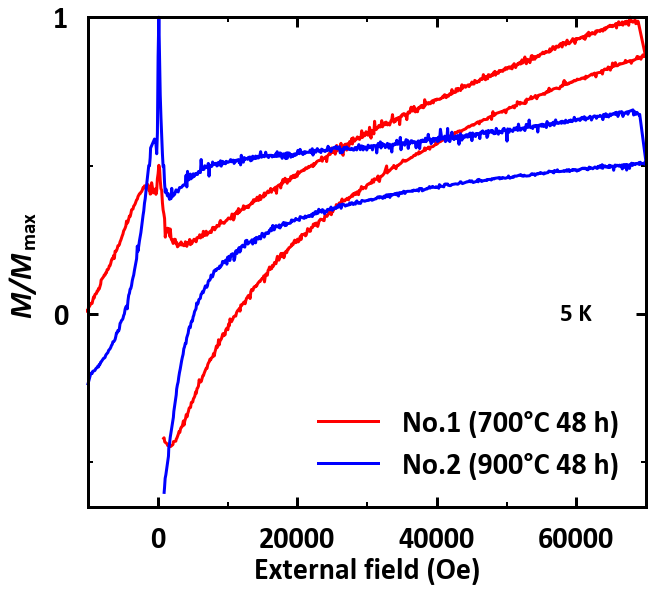

In [80]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(-10000, 70000)
ax1.set_xticks(np.arange(0, 70000, 20000))
ax1.set_xticklabels(np.arange(0, 70000, 20000), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'External field (Oe)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10000))

#y軸の目盛りの設定
ax1.set_ylim(-0.65, 1)
ax1.set_yticks(np.arange(0, 2, 1))
ax1.set_yticklabels(np.arange(0, 2, 1), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'M/$\mathregular{M_{max}}$', fontproperties = f_Calibriz, fontsize = 30)
ax1.text(-17000, 0.1, 'M/$\mathregular{M}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-17000, 0.28, '$\mathregular{_{max}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)


#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#プロット
ax1.plot(df_700_MH['Magnetic Field (Oe)'], df_700_MH["Moment (emu)"]/df_700_MH["Moment (emu)"].max(), color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_MH['Magnetic Field (Oe)'], df_900_MH["Moment (emu)"]/df_900_MH["Moment (emu)"].max(), color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(60000, 0, '5 K', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')

plt.show()

fig.savefig("VSM_Result/MH Nomarzied.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [81]:
import pandas as pd
df_700_jc = pd.read_csv('VSM_Result/No 1 700 48h jc.csv', header = 0)
df_900_jc = pd.read_csv('VSM_Result/No 2 900 48h jc.csv', header = 0)

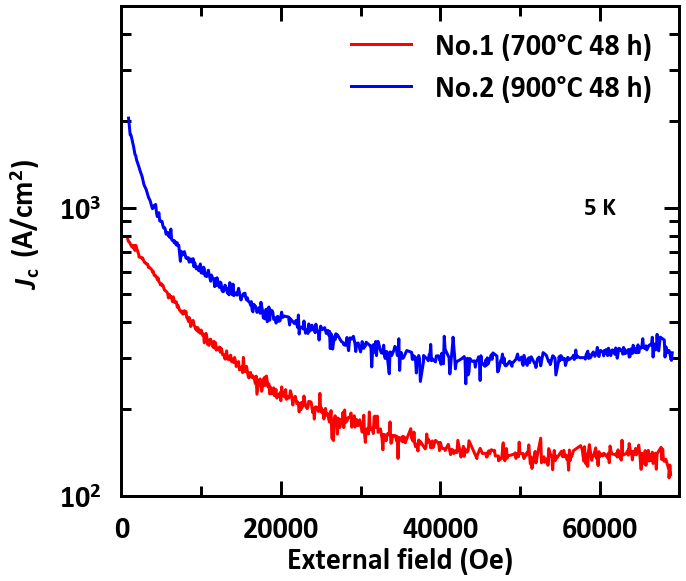

In [84]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 15, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 3, length = 10)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 70000)
ax1.set_xticks(np.arange(0, 70000, 20000))
ax1.set_xticklabels(np.arange(0, 70000, 20000), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'External field (Oe)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10000))

#y軸の目盛りの設定
ax1.set_yscale('log')
ax1.set_ylim(100, 5000)
ax1.set_yticks([100, 1000])
ax1.set_yticklabels(['$\mathregular{10^{2}}$', '$\mathregular{10^{3}}$'], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-10000, 550, '$\mathregular{J}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-10000, 600, '$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-10000, 1000, '(A/$\mathregular{cm^{2}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)


#y軸の補助目盛りの設定
#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(250))

#プロット
ax1.plot(df_700_jc['Magnetic Field (Oe)'], df_700_jc["jc"], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_jc['Magnetic Field (Oe)'], df_900_jc["jc"], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(60000, 1000, '5 K', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')

plt.show()

fig.savefig("VSM_Result/jc.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [85]:
df_Hc2_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hc2.csv', header = 0)
df_Hirr_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hirr.csv', header = 0)
df_Hc2_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hc2.csv', header = 0)
df_Hirr_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hirr.csv', header = 0)
df_700_jc = pd.read_csv('VSM_Result/No 1 700 48h jc.csv', header = 0)
df_900_jc = pd.read_csv('VSM_Result/No 2 900 48h jc.csv', header = 0)

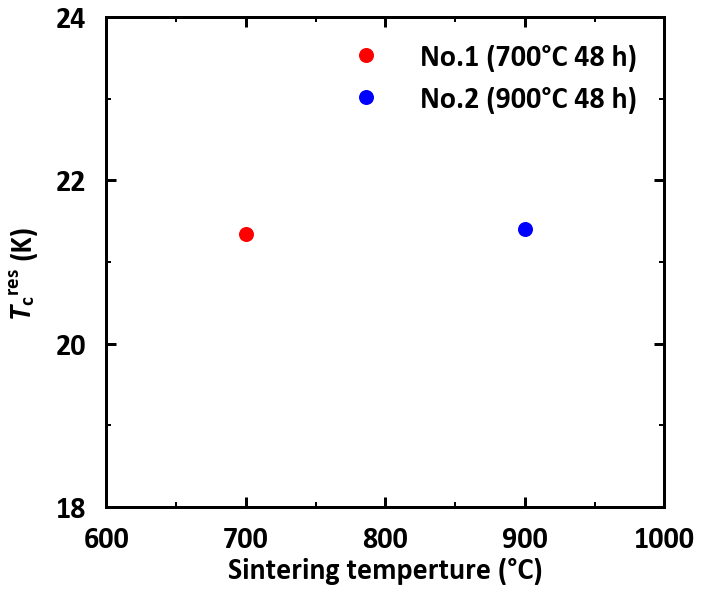

In [89]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperture (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(18, 24)
ax1.set_yticks(np.arange(18, 25, 2))
ax1.set_yticklabels(np.arange(18, 25, 2), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 20.7-0.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21-0.3, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#プロット
ax1.plot(1, df_Hc2_700.iloc[0, 1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_Hc2_900.iloc[0, 1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

plt.show()

fig.savefig("Result/Tc.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

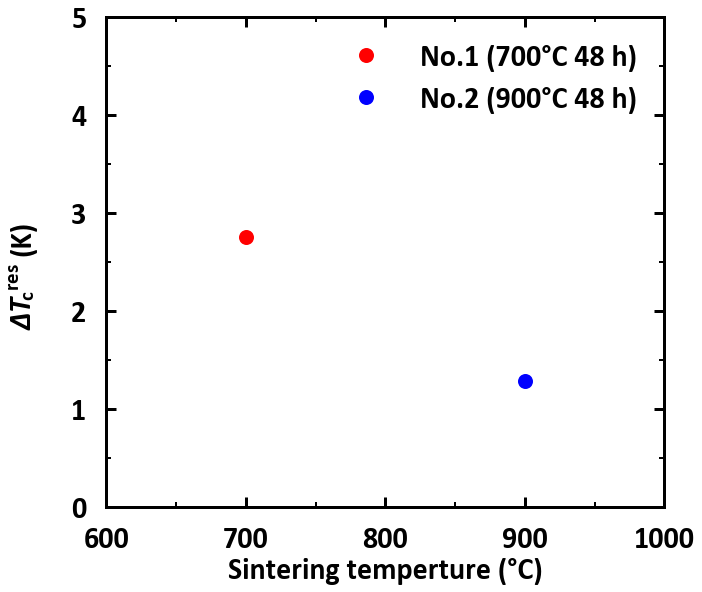

In [95]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperture (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(0, 5)
ax1.set_yticks(np.arange(0, 6, 1))
ax1.set_yticklabels(np.arange(0, 6, 1), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 2.2-0.2, r'$\mathregular{\Delta{T}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 2.5-0.2, r'$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

ax1.text(-0.5, 2.5+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#プロット
ax1.plot(1, df_Hc2_700.iloc[0, 1]-df_Hirr_700.iloc[0, 1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_Hc2_900.iloc[0, 1]-df_Hirr_900.iloc[0, 1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

plt.show()

fig.savefig("Result/delta_Tc.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

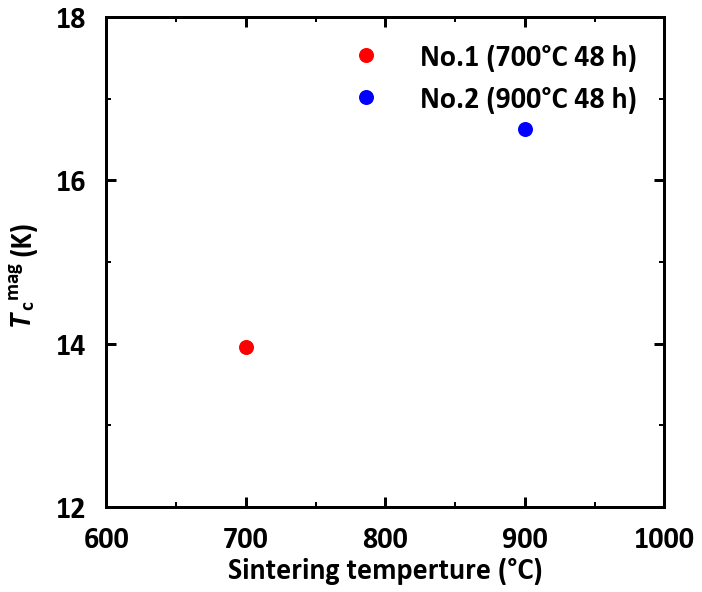

In [100]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperture (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(12, 18)
ax1.set_yticks(np.arange(12, 20, 2))
ax1.set_yticklabels(np.arange(12, 20, 2), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 14.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 15-0.3, '$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 15+0.3, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#プロット
ax1.plot(1, 13.956099206031604, color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, 16.634817208379474, color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

plt.show()

fig.savefig("Result/Tcmag.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

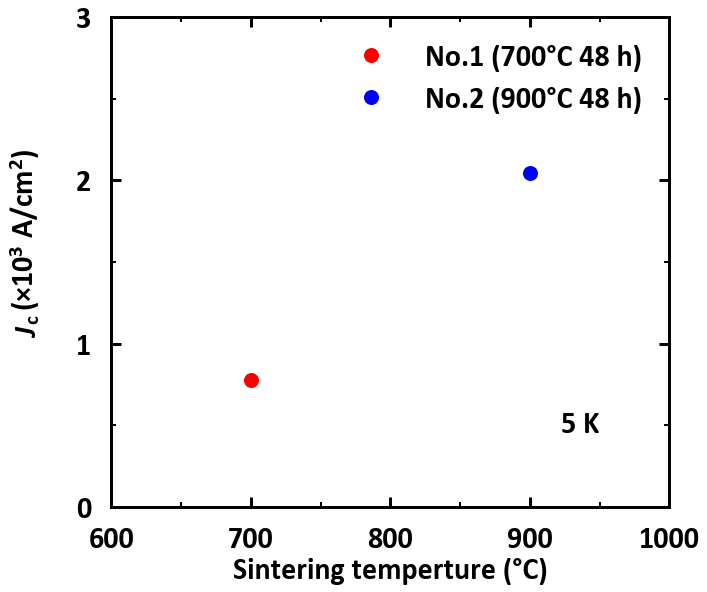

In [105]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperture (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(0, 3000)
ax1.set_yticks(np.arange(0, 3001, 1000))
ax1.set_yticklabels([0, 1, 2, 3], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 1480-400, r'$\mathregular{J}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 1550-400, r'$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 1500+200, '(×'+'$\mathregular{10^{3}}$'+' A/'+'$\mathregular{cm^{2}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

#プロット
ax1.plot(1, df_700_jc.iloc[0,1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_900_jc.iloc[0,1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(3.5, 500, '5 K', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 0)

plt.show()

fig.savefig("Result/jc_.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

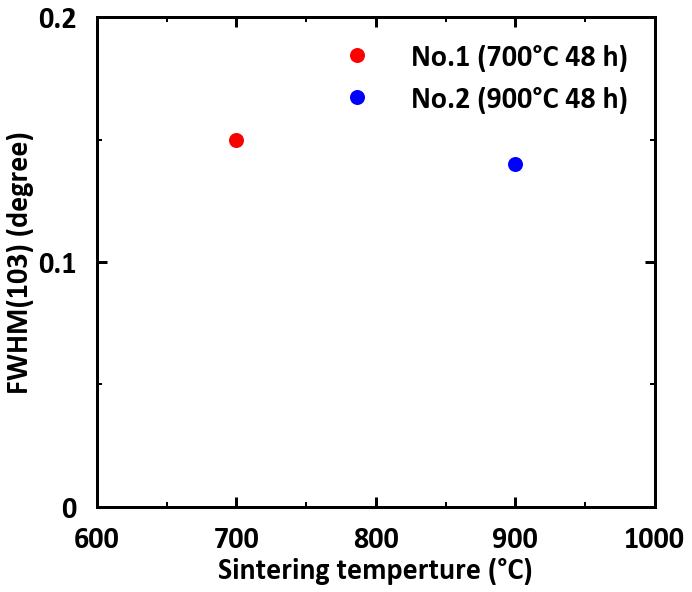

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperture (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(0, 0.2)
ax1.set_yticks(np.arange(0, 0.3, 0.1))
ax1.set_yticklabels([0, 0.1, 0.2], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_ylabel(ylabel = 'FWHM(103) (degree)', fontproperties = f_Calibrib, fontsize = 30)
#ax1.text(-0.5, 1500-400, r'$\mathregular{J_{c}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
#ax1.text(-0.5, 1500+200, '(×'+'$\mathregular{10^{3}}$'+' A/'+'$\mathregular{cm^{2}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

#プロット
ax1.plot(1, 0.15, color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, 0.14, color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
#ax1.text(3.5, 500, '5 K', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 0)

plt.show()

fig.savefig("Result/FWHM.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [23]:
df_700_Mave = pd.read_csv('VSM_Result/No 2 700 48h Mave.csv', header = 0)
df_900_Mave = pd.read_csv('VSM_Result/No 2 900 48h Mave.csv', header = 0)

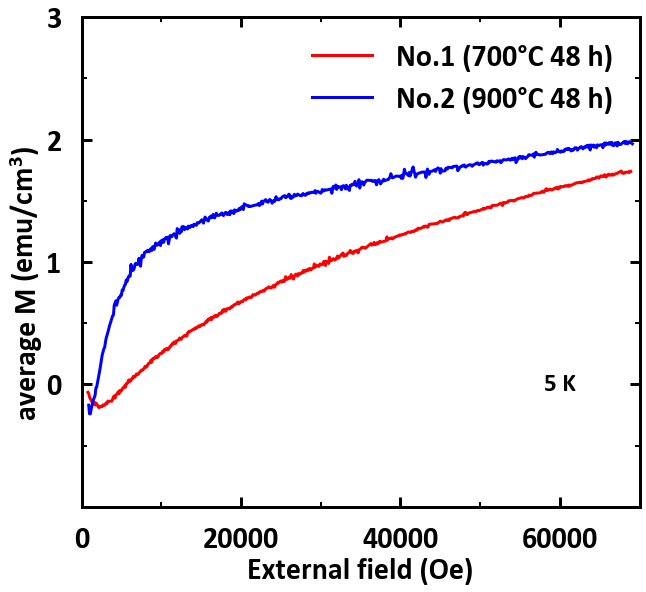

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 70000)
ax1.set_xticks(np.arange(0, 70000, 20000))
ax1.set_xticklabels(np.arange(0, 70000, 20000), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'External field (Oe)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10000))

#y軸の目盛りの設定
ax1.set_ylim(-1, 3)
ax1.set_yticks(np.arange(0, 4, 1))
ax1.set_yticklabels(np.arange(0, 4, 1), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-5000, 0.25, 'average M', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-5000, 1.4, '(emu/$\mathregular{cm^{3}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)


#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#プロット
ax1.plot(df_700_Mave['Magnetic Field (Oe)'], (df_700_Mave["Moment (emu)_x"]+df_700_Mave["Moment (emu)_y"])/2, color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
ax1.plot(df_900_Mave['Magnetic Field (Oe)'], (df_900_Mave["Moment (emu)_x"]+df_900_Mave["Moment (emu)_y"])/2, color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト
ax1.text(60000, 0, '5 K', fontproperties = f_Calibrib, fontsize = 25, ha = 'center', va = 'center')

plt.show()

fig.savefig("VSM_Result/Mave.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [31]:
df_Hc2_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hc2.csv', header = 0)
df_Hirr_700 = pd.read_csv('PPMS_Result/No 1 700 48h Hirr.csv', header = 0)
df_Hc2_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hc2.csv', header = 0)
df_Hirr_900 = pd.read_csv('PPMS_Result/No 2 900 48h Hirr.csv', header = 0)
df_700_jc = pd.read_csv('VSM_Result/No 1 700 48h jc.csv', header = 0)
df_900_jc = pd.read_csv('VSM_Result/No 2 900 48h jc.csv', header = 0)

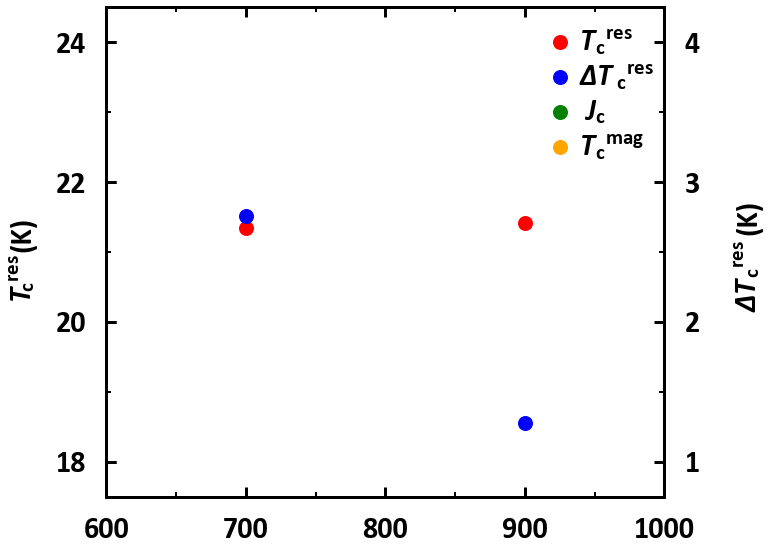

In [94]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_xlabel(xlabel = 'Sintering temperature (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(17.5, 24.5)
ax1.set_yticks(np.arange(18, 25, 2))
ax1.set_yticklabels(np.arange(18, 25, 2), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 20.7-0.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21-0.3, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#プロット
ax1.plot(1, df_Hc2_700.iloc[0, 1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_Hc2_900.iloc[0, 1], color = 'red', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

ax2 = ax1.twinx()
ax2.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.yaxis.set_ticks_position('both')

ax2.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax2.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)


ax2.set_ylim(0.75, 4.25)
ax2.set_yticks(np.arange(1, 5, 1))
ax2.set_yticklabels(np.arange(1, 5, 1), fontproperties = f_Calibrib, fontsize = 30)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax2.plot(1, df_Hc2_700.iloc[0, 1]-df_Hirr_700.iloc[0, 1], color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
ax2.plot(3, df_Hc2_900.iloc[0, 1]-df_Hirr_900.iloc[0, 1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
ax2.text(4.7, 2.2, r'$\mathregular{\Delta{T}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 2.45, r'$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 2.5+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#凡例
ax1.text(3.5, 24, 'T', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 24, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 24, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.65, 23.5, r'$\mathregular{\Delta{T}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.65, 23.5, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 23.5, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.5, 23, 'J', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 23, '$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 23, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.5, 22.5, 'T', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 22.5, '$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 22.5, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)


plt.show()

fig.savefig("Result/Tc_deltaTc.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

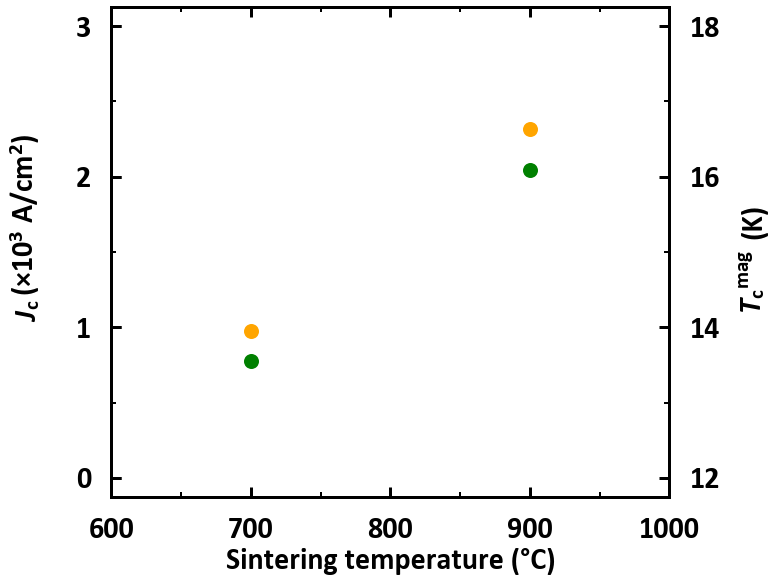

In [93]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Sintering temperature (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(0-250/2, 3000+250/2)
ax1.set_yticks(np.arange(0, 3001, 1000))
ax1.set_yticklabels([0, 1, 2, 3], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 1480-400, r'$\mathregular{J}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 1550-400, r'$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 1500+250, '(×'+'$\mathregular{10^{3}}$'+' A/'+'$\mathregular{cm^{2}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

#プロット
ax1.plot(1, df_700_jc.iloc[0,1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_900_jc.iloc[0,1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)
   
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

ax2 = ax1.twinx()
ax2.spines['right'].set_linewidth(3)
ax2.yaxis.set_ticks_position('both')

ax2.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax2.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)


ax2.set_ylim(12-0.25, 18+0.25)
ax2.set_yticks(np.arange(12, 19, 2))
ax2.set_yticklabels(np.arange(12, 19, 2), fontproperties = f_Calibrib, fontsize = 30)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax2.plot(1, 13.956099206031604, color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)
ax2.plot(3, 16.634817208379474, color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)
ax2.text(4.7, 14.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 15-0.3, '$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 15+0.4, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#凡例


plt.show()

fig.savefig("Result/jc_Tcmag.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

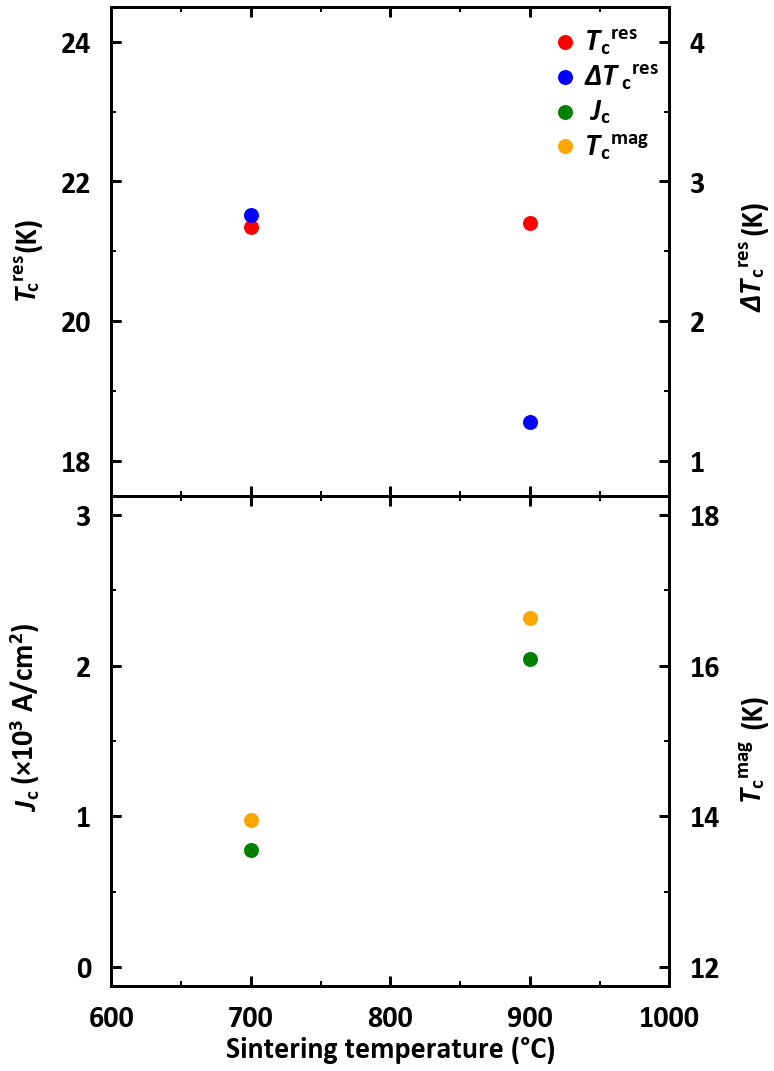

In [109]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')


#グラフ作成
fig = plt.figure(figsize = (10, 20))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.0)
ax1 = fig.add_subplot(211)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(0, 4)
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xticklabels([], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_xlabel(xlabel = 'Sintering temperature (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax1.set_ylim(17.5, 24.5)
ax1.set_yticks(np.arange(18, 25, 2))
ax1.set_yticklabels(np.arange(18, 25, 2), fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(-0.5, 20.7-0.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21-0.3, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax1.text(-0.5, 21+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#プロット
ax1.plot(1, df_Hc2_700.iloc[0, 1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
ax1.plot(3, df_Hc2_900.iloc[0, 1], color = 'red', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

ax2 = ax1.twinx()
ax2.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.yaxis.set_ticks_position('both')

ax2.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax2.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)


ax2.set_ylim(0.75, 4.25)
ax2.set_yticks(np.arange(1, 5, 1))
ax2.set_yticklabels(np.arange(1, 5, 1), fontproperties = f_Calibrib, fontsize = 30)
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax2.plot(1, df_Hc2_700.iloc[0, 1]-df_Hirr_700.iloc[0, 1], color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
ax2.plot(3, df_Hc2_900.iloc[0, 1]-df_Hirr_900.iloc[0, 1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)
ax2.text(4.7, 2.2, r'$\mathregular{\Delta{T}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 2.45, r'$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax2.text(4.7, 2.5+0.25, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#凡例
ax1.text(3.5, 24, 'T', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 24, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 24, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'red', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.65, 23.5, r'$\mathregular{\Delta{T}}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.65, 23.5, '$\mathregular{{_{c}}^{res}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 23.5, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.5, 23, 'J', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 23, '$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 23, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)

ax1.text(3.5, 22.5, 'T', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center')
ax1.text(3.5, 22.5, '$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'left', va = 'center')
ax1.plot(3.25, 22.5, color = 'blue', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)

ax3 = fig.add_subplot(212)


#グラフの詳細設定

ax3.patch.set_facecolor('white')
ax3.patch.set_alpha(1)
ax3.grid(color = 'black', linestyle = '--', linewidth = 0)
ax3.set_axisbelow(True)
ax3.spines['top'].set_linewidth(3)
ax3.spines['bottom'].set_linewidth(3)
ax3.spines['right'].set_linewidth(3)
ax3.spines['left'].set_linewidth(3)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax3.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax3.minorticks_on()

#x軸の主目盛りの設定
ax3.set_xlim(0, 4)
ax3.set_xticks(np.arange(0, 5, 1))
ax3.set_xticklabels([600, 700, 800, 900, 1000], fontproperties = f_Calibrib, fontsize = 30)
ax3.set_xlabel(xlabel = 'Sintering temperature (°C)', fontproperties = f_Calibrib, fontsize = 30)

#x軸の補助目盛りの設定
ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

#y軸の目盛りの設定
ax3.set_ylim(0-250/2, 3000+250/2)
ax3.set_yticks(np.arange(0, 3001, 1000))
ax3.set_yticklabels([0, 1, 2, 3], fontproperties = f_Calibrib, fontsize = 30)
#ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)
ax3.text(-0.5, 1480-400, r'$\mathregular{J}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax3.text(-0.5, 1550-400, r'$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax3.text(-0.5, 1500+250, '(×'+'$\mathregular{10^{3}}$'+' A/'+'$\mathregular{cm^{2}}$)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#y軸の補助目盛りの設定
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

#プロット
ax3.plot(1, df_700_jc.iloc[0,1], color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)
ax3.plot(3, df_900_jc.iloc[0,1], color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'g', mew = 0, linewidth = 0, clip_on = False)
   
#タイトル
ax3.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(prop={'size':30,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False,)

#テキスト

ax4 = ax3.twinx()
ax4.spines['right'].set_linewidth(3)
ax4.yaxis.set_ticks_position('both')

ax4.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax4.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)


ax4.set_ylim(12-0.25, 18+0.25)
ax4.set_yticks(np.arange(12, 19, 2))
ax4.set_yticklabels(np.arange(12, 19, 2), fontproperties = f_Calibrib, fontsize = 30)
ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax4.plot(1, 13.956099206031604, color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)
ax4.plot(3, 16.634817208379474, color = 'blue', label = 'No.2 (900°C 48 h)', marker = '.', markersize = '30', markerfacecolor = 'orange', mew = 0, linewidth = 0, clip_on = False)
ax4.text(4.7, 14.3, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax4.text(4.7, 15-0.3, '$\mathregular{{_{c}}^{mag}}$', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)
ax4.text(4.7, 15+0.4, '(K)', fontproperties = f_Calibrib, fontsize = 30, ha = 'right', va = 'center', rotation = 90)

#凡例


plt.show()

fig.savefig("Result/特徴.svg", format = 'svg', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')